In [1]:
import scipy.io as sio
import scipy.stats as stats
from scipy.stats import multivariate_normal
import numpy as np
import matplotlib.pyplot as plt

class_al = sio.loadmat('lab2_2.mat')['al']
class_bl = sio.loadmat('lab2_2.mat')['bl']
class_cl = sio.loadmat('lab2_2.mat')['cl']

Parametric

In [2]:
#gaussian 2d
class_al_mle_mean = np.mean(class_al, axis=0)
class_bl_mle_mean = np.mean(class_bl, axis=0)
class_cl_mle_mean = np.mean(class_cl, axis=0)

class_al_mle_variance = np.cov(class_al.T)
class_bl_mle_variance = np.cov(class_bl.T)
class_cl_mle_variance = np.cov(class_cl.T)

#mesh grid
x = np.concatenate((class_al,class_bl, class_cl), axis = 0)
x_1_min, x_1_max = x[:,0].min() - 120, x[:,0].max() + 120
x_2_min, x_2_max = x[:,1].min() - 10, x[:,1].max() + 10
steps = 1000
x_1_range = np.linspace(x_1_min, x_1_max, steps)
x_2_range = np.linspace(x_2_min, x_2_max, steps)

X_1_mesh, Y_1_mesh = np.meshgrid(x_1_range, x_2_range)

In [3]:
def maximum_likelihood(mean_a, cov_a, mean_b, cov_b, X_mesh, Y_mesh):
    row = X_mesh.shape[0]
    col = X_mesh.shape[1]
    mesh_points = np.concatenate((X_mesh.reshape(row*col,1), Y_mesh.reshape(row*col,1)), axis = 1)
    inv_cov_a = np.linalg.inv(np.array(cov_a))
    inv_cov_b = np.linalg.inv(np.array(cov_b))
    result = []
    for p in mesh_points:
        dist_a = np.dot(np.dot(np.subtract(p, mean_a), inv_cov_a), np.subtract(p, mean_a).T)
        dist_b = np.dot(np.dot(np.subtract(p, mean_b), inv_cov_b), np.subtract(p, mean_b).T)
        result.append(dist_b - dist_a)
    return np.array(result)

In [4]:
ML_ab = maximum_likelihood(class_al_mle_mean, class_al_mle_variance, class_bl_mle_mean, class_bl_mle_variance, X_1_mesh, Y_1_mesh)
ML_ac = maximum_likelihood(class_cl_mle_mean, class_cl_mle_variance, class_al_mle_mean, class_al_mle_variance, X_1_mesh, Y_1_mesh)
ML_bc = maximum_likelihood(class_bl_mle_mean, class_bl_mle_variance, class_cl_mle_mean, class_cl_mle_variance, X_1_mesh, Y_1_mesh)

In [5]:
cls_arr = np.concatenate((ML_ab.reshape(steps*steps,1), ML_ac.reshape(steps*steps,1), ML_bc.reshape(steps*steps,1)), axis = 1)
class_result = np.argmin(cls_arr, axis=1).reshape(steps,steps)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: linewidths is ignored by contourf
  # Remove the CWD from sys.path while we load stuff.


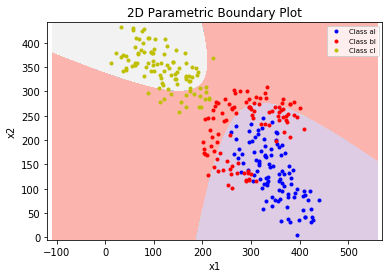

In [6]:
fig1, ax1 = plt.subplots()
a, = ax1.plot(class_al[:,0], class_al[:,1], "b.")
b, = ax1.plot(class_bl[:,0], class_bl[:,1], 'r.')
c, = ax1.plot(class_cl[:,0], class_cl[:,1], 'y.')
ax1.legend((a, b, c), ('Class al', 'Class bl', 'Class cl'), loc='best', fontsize='x-small')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Parametric Boundary Plot')
plt.axis('equal')
plt.contourf(X_1_mesh, Y_1_mesh, class_result, linewidths=1, cmap="Pastel1")
plt.show()

Non Parametric

In [7]:

mesh_points = np.concatenate((X_1_mesh.reshape(steps*steps,1), Y_1_mesh.reshape(steps*steps,1)), axis = 1)
windows_std_dev = 20
windows_variance = np.power(windows_std_dev,2)
prob_al = []
prob_bl = []
prob_cl = []

def gaussian_kernel(u):
    return (1/(2*np.pi)) * np.exp(-0.5*np.sum(u * u, axis=1)) 

#loop through each x
for index, item in enumerate(mesh_points):
    u_a = (item - class_al) / windows_std_dev
    p_al = 1/np.size(class_al) * np.sum(1 / windows_variance * gaussian_kernel(u_a))
    prob_al.append(p_al)

    u_b = (item - class_bl) / windows_std_dev
    p_bl = 1/np.size(class_bl) * np.sum(1 / windows_variance * gaussian_kernel(u_b))
    prob_bl.append(p_bl)

    u_c = (item - class_cl) / windows_std_dev
    p_cl = 1/np.size(class_cl) * np.sum(1 / windows_variance * gaussian_kernel(u_c))
    prob_cl.append(p_cl)


In [8]:
prob_al = np.array(prob_al)
prob_bl = np.array(prob_bl)
prob_cl = np.array(prob_cl)

cls_arr_2 = np.concatenate((prob_bl.reshape(steps*steps,1), prob_al.reshape(steps*steps,1), prob_cl.reshape(steps*steps,1)), axis = 1)
class_result_2 = np.argmax(cls_arr_2, axis=1).reshape(steps,steps)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: linewidths is ignored by contourf
  # Remove the CWD from sys.path while we load stuff.


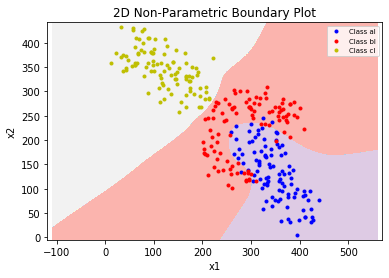

In [9]:
fig2, ax2 = plt.subplots()
a, = ax2.plot(class_al[:,0], class_al[:,1], "b.")
b, = ax2.plot(class_bl[:,0], class_bl[:,1], 'r.')
c, = ax2.plot(class_cl[:,0], class_cl[:,1], 'y.')
ax2.legend((a, b, c), ('Class al', 'Class bl', 'Class cl'), loc='upper right', fontsize='x-small')
plt.axis('equal')
plt.title('2D Non-Parametric Boundary Plot')
plt.xlabel('x1')
plt.ylabel('x2')
plt.contourf(X_1_mesh, Y_1_mesh, class_result_2, linewidths=1, cmap="Pastel1")
plt.show()